# How to create a plot with cartopy basemap

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
data_file = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v1.1_DLR1.0_ssp370_road_MISC_201501-201512.nc'

In [3]:
data = xr.open_dataset(data_file).drop('lev')

CO_flux = data['CO_flux']
NH3_flux = data['NH3_flux']
NOx_flux = data['NOx_flux']
SO2_flux = data['SO2_flux']

Text(0, 0.5, 'latitude')

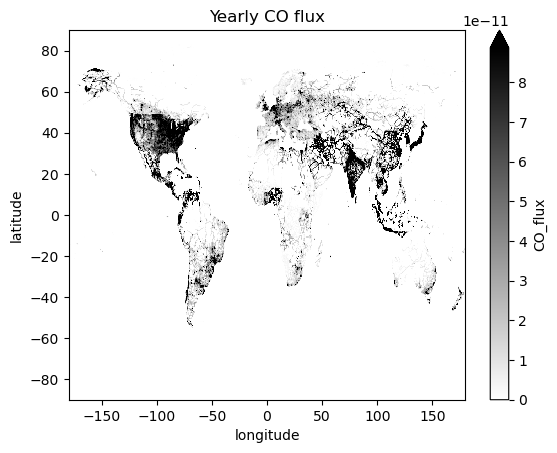

In [4]:
CO_flux_yearly = CO_flux.mean(dim='time')

CO_flux_yearly.plot(robust=True, cmap=plt.cm.binary)
plt.title('Yearly CO flux')
plt.xlabel('longitude')
plt.ylabel('latitude')

this snazzy plot could be made even snazzier by adding a basemap. Using this nice tutorial: https://medium.com/@lubomirfranko/climate-data-visualisation-with-python-visualise-climate-data-using-cartopy-and-xarray-cf35a60ca8ee

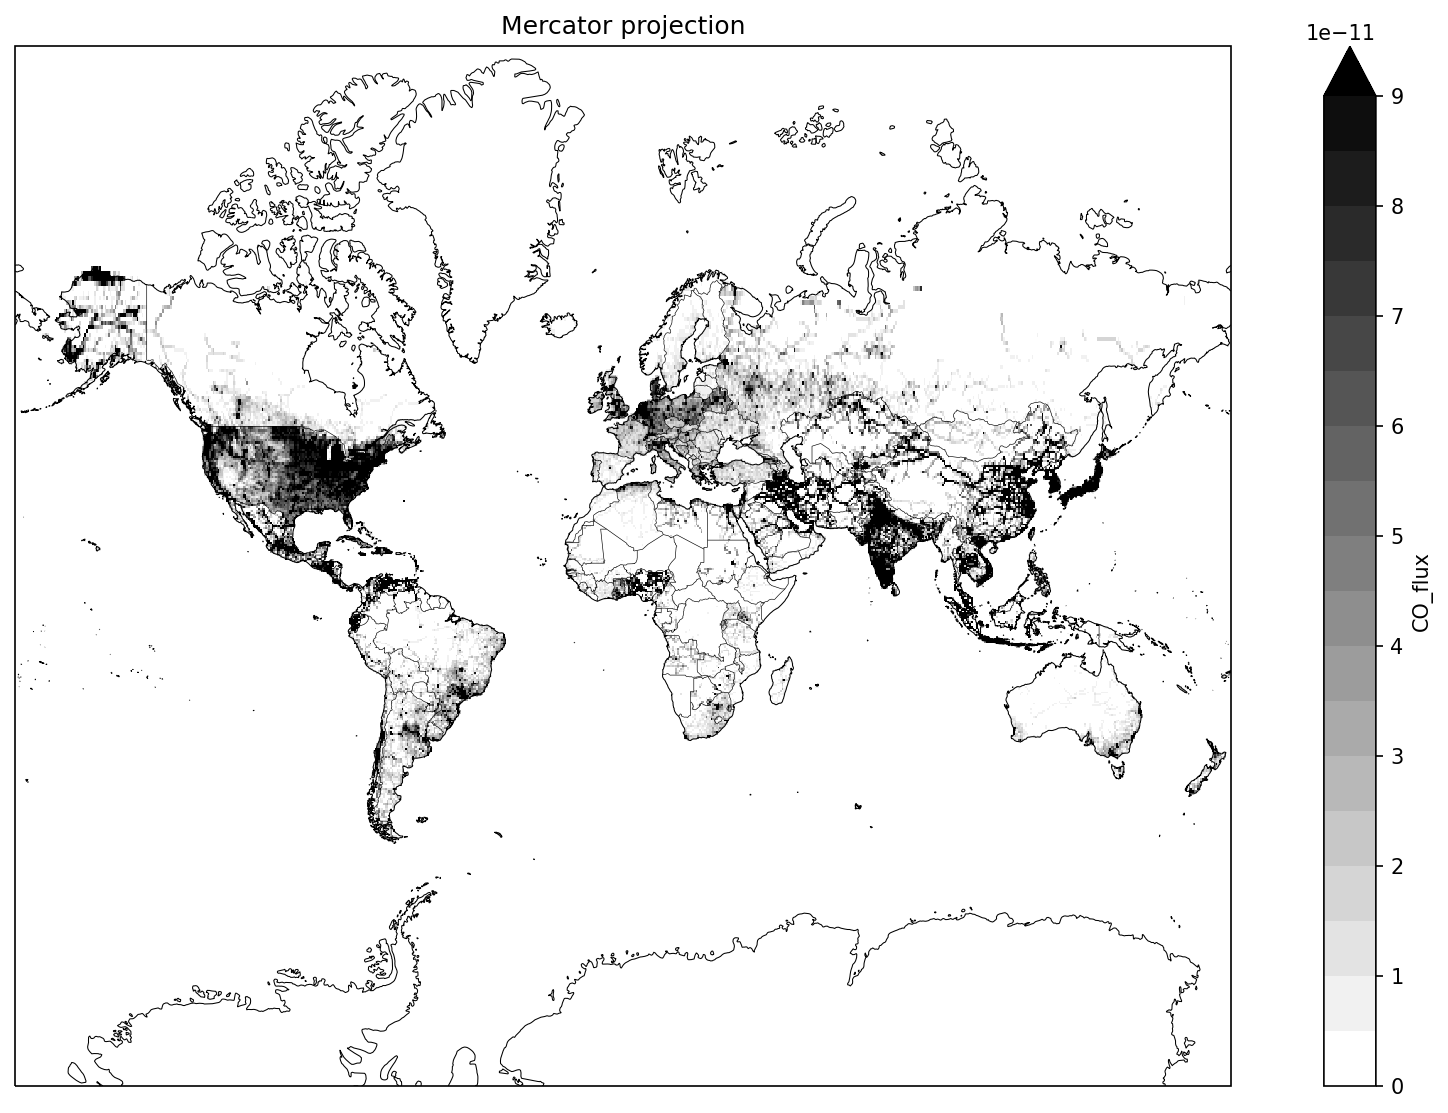

In [5]:

def plot_dataset(dataset : xr.Dataset):

    projection = ccrs.Mercator()
    crs = ccrs.PlateCarree()
    # Now we will create axes object having specific projection 
    plt.figure(figsize=(16,9), dpi=150)
    ax = plt.axes(projection=projection, frameon=True)

    # To plot borders and coastlines, we can use cartopy feature
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
    
    dataset[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), levels=21, robust=True, cmap=plt.cm.binary)
    
    plt.title("Mercator projection")
    plt.show()

plot_dataset(CO_flux_yearly)


We can of course zoom in

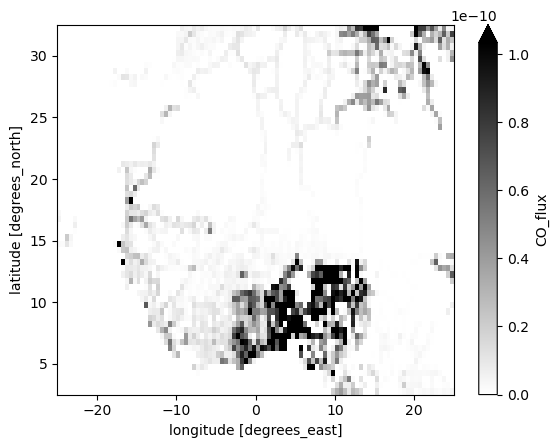

In [24]:
CO_flux_yearly_europe = CO_flux_yearly.isel(lat=slice(185, 245), lon = slice(310,410))
CO_flux_yearly_europe.plot(robust=True, cmap=plt.cm.binary)

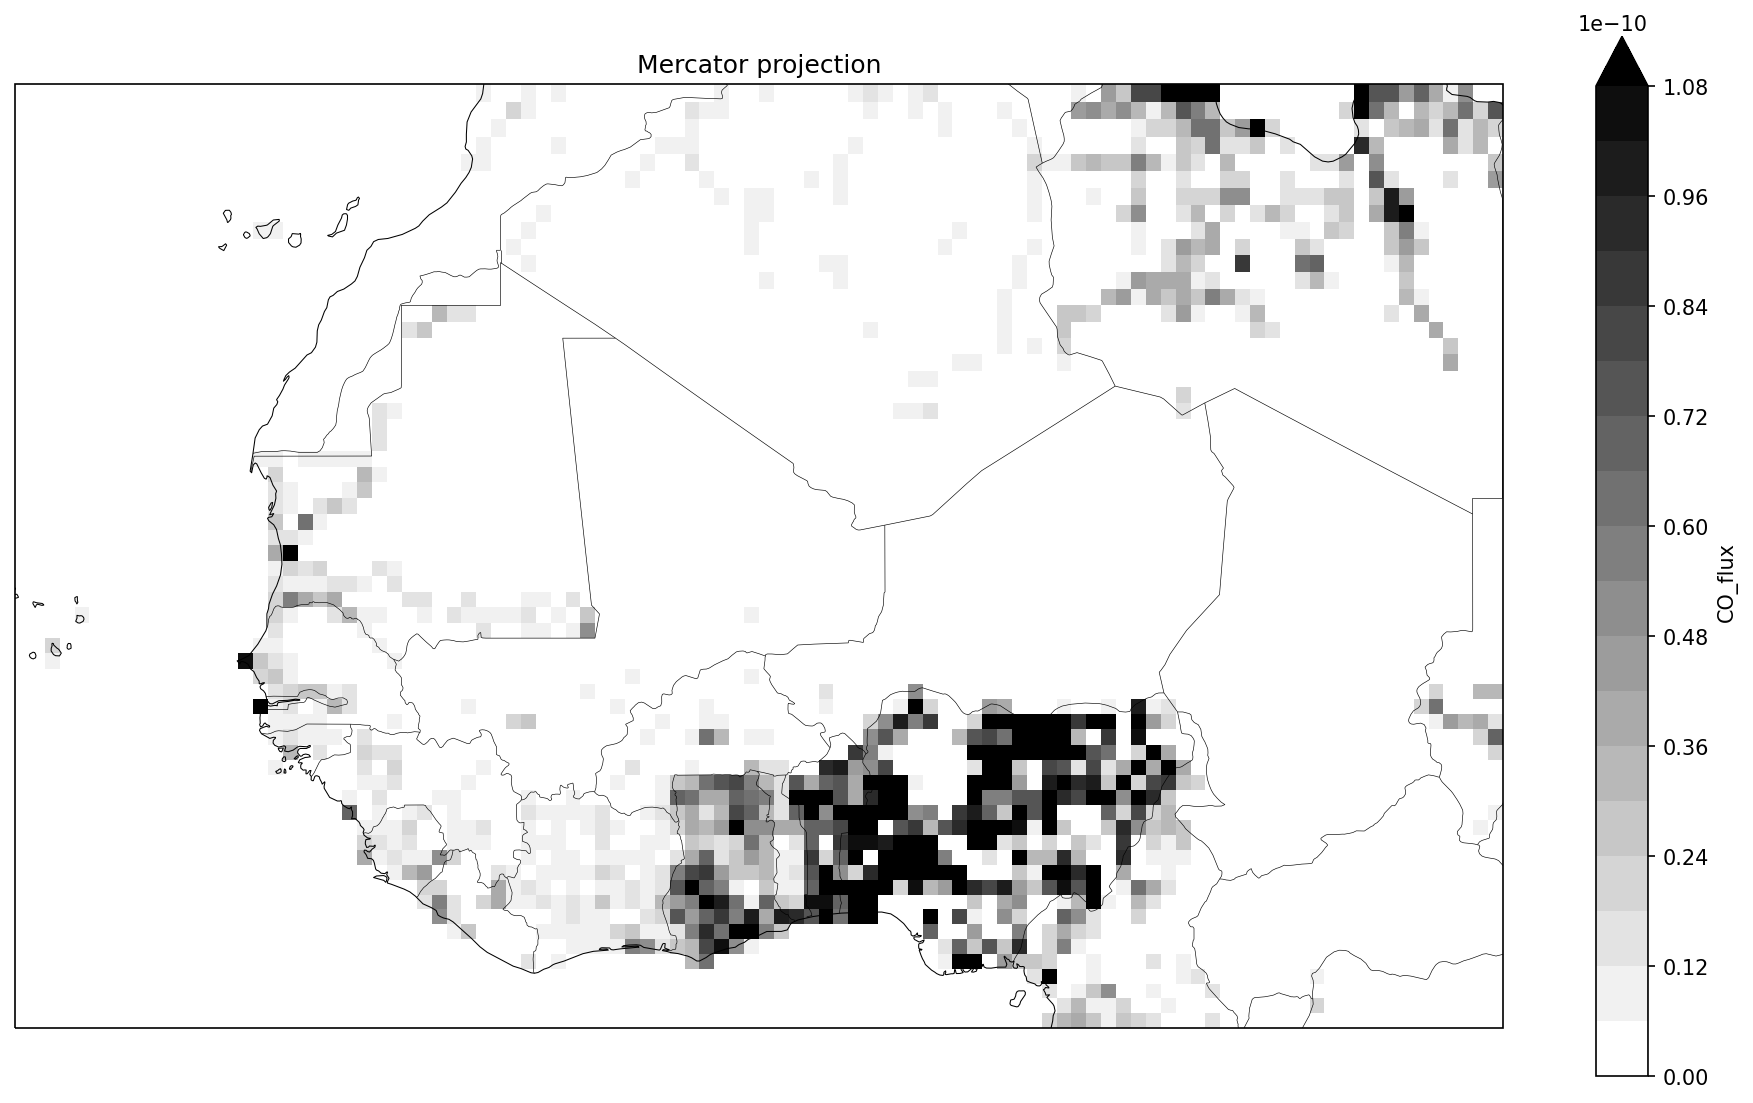

In [25]:
plot_dataset(CO_flux_yearly_europe)

We can also have different projections like so:

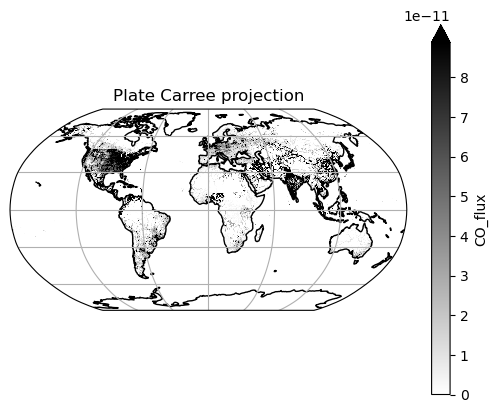

In [8]:
CO_flux_average = CO_flux.mean(dim='time')

ax = plt.axes(projection=ccrs.Robinson())
CO_flux_average.plot(robust=True, ax=ax, transform=ccrs.PlateCarree(), cmap='binary') 
ax.set_title('Plate Carree projection')
ax.coastlines();
ax.gridlines(); 